<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/training/NLP_VDCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.

Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:GiOHgEv6kXoGvarJ6Q2+ycHQbzG2YjuPW3unELB7W0Y root@7925709dfe77
The key's randomart image is:
+---[RSA 4096]----+
|                 |
| .               |
|..o              |
|o+ = .           |
|= * B E S        |
|o+ * O +         |
|.+O B +          |
|+*BB *. .        |
|*O==+..o         |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts


# github.com:22 SSH-2.0-babeld-728b22c0


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDSINoW0mx9gHxu0x0m+pfejY/LVXjjSoaleW3ID0YqCcvTmeE1zzqOyokLPvVpxjwBvYKHSaLfzniL0jYiZxYRA3OinTqHqpbztRe1LHulZVtCH4xc9P6caZcakgjroXPgykrhXQOo6bStDmX2CJ0QweZKqHQ0TnQiS2DR77EhXF/YJSXYa4Etk+BfcNAeliMPghuc64bfxiCLvy/WKLohTOUMr02/sfzHICBdxR/YUMMCWscGMLh43HgdfiPFGI7lzjWjdsGXAxNpFtTmBBhVTMuiTqrwYyDwktYvkBbwYOuNcTUCgIi3ZoOcgC/FBR5AAGgKKGDkhSyx7pKCzvEHCrl+ahPPyiEjc7UgnUk3u4R8bkisRIqbu5D8VrmB04M61hHiMdEG0PSnFNl/tho07LmURnnClauMl67F0O/+Vds58wbqomipSAASyxJuWfkt382wRD3upcdBCfXxLJz7DoiUvnM7jgCsKiCPccKyBEFwUypU0xa53Kg0hwm6JlpvtTUvujILOS/yTMFUyCNZK+hwO81lbsC8D92tVSGSNH7QgRwvJJeNXfFHC4IXed/KWsS8Po9jhhUev01GlKDpX72MgmDE5Kto2UGdz/YLUrp8rPeK0Wdv0TWo4P73BVYpVjtCUh9MujplgPSF7oRiqYlzQTpvxLEcrfIHxngxPQ== root@7925709dfe77


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 292 (delta 19), reused 31 (delta 11), pack-reused 246
Receiving objects: 100% (292/292), 266.14 MiB | 20.79 MiB/s, done.
Resolving deltas: 100% (114/114), done.
Checking out files: 100% (31/31), done.


---
---

# 2.Data Importing

### 2.1. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [ ]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Check CUDA Version

---

We need to check the cuda version to download the correct version of spaCy for this application.

In [ ]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [1]:
# install necessary libraries that might not be found
!pip install -U spacy
!python -m spacy validate
!pip install -U pip setuptools wheel
!pip install -U spacy[cuda110,transformers,lookups]
!python -m spacy download en_core_web_lg

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 6.4 MB 5.3 MB/s 
     |████████████████████████████████| 621 kB 55.9 MB/s 
     |████████████████████████████████| 42 kB 1.6 MB/s 
     |████████████████████████████████| 10.1 MB 61.4 MB/s 
     |████████████████████████████████| 456 kB 45.9 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
2021-07-27 08:26:56.091128: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully

distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
     |████████████████████████████████| 169.2 MB 23 kB/s 
     |████████████████████████████████| 97.3 MB 33 kB/s 
     |████████████████████████████████| 2.2 MB 48.1 MB/s 
     |████████████████████████████████| 998 kB 55.0 MB/s 
     |████████████████████████████████| 895 kB 45.0 MB/s 
     |████████████████████████████████| 3.3 MB 54.5 MB/s 
  distutils: /usr/local/include/python3.7/tokenizers
  sysconfig: /usr/include/python3.7m/tokenizers
  distutils: /usr/local/include/python3.7/sacremoses
  sysconfig: /usr/include/python3.7m/sacremoses
  distutils: /usr/local/include/pytho

### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [2]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [3]:
# use pandas to read the excel file and populate it in a pandas dataframe
companies = pd.read_excel('./clean_dataset.xlsx')

# see the top 10 companies that are populated in the dataframe
companies.head(10)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,For over 80 years of experience in creating an...,NaN
1,23248790229909752,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9...,Yatai's main products cover various cleaning m...,NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing ...",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510784,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions...",NaN
5,54863889264716592,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,NaN,tmt,it_services,it_services,midstream,https://www.tongdun.net/info/company,Tongdun Technology is a professional third-par...,NaN
6,60624700618157752,EMASTIGA ENGRG PTE LTD,SINGAPORE,NaN,cni,cni_service providers,cni_service providers,midstream,http://emastiga.com/,"For over 30 years, EMASTIGA has been servicing...",Holding company and also provides it_services....
7,102285011598298000,"AEROFLUID CO.,LTD.",THAILAND,NaN,CNI,cni_equipment suppliers,cni_equipment suppliers,MIDSTREAM,https://www.matchlink.asia/business/page/Thail...,Sales of hydraulic equipment and parts,NaN
8,120313950904532608,EXCELKOS SDN. BHD.,MALAYSIA,NaN,IND,diversified,rubber,Manufacturer,https://www.excelkos.com/,"For Excelkos, it all started with a far-sighte...",NaN
9,125319506467804896,KUM ENG HUAT ELECTRIC CO PTE LTD,SINGAPORE,NaN,tmt,consumer electronics,consumer electronics_distributor,downstream,https://kumenghuat.com.sg/pages/about,Kum Eng Huat is the authorised dealer for Osra...,NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [4]:
# see the row headers of the entire pandas dataframe first
list(companies.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [5]:
# get the total number of records in the dataframe
df_count = companies['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = companies['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = companies['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = companies['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = companies['Valuechain'].nunique()

# get count of total unique archetypes
df_countArchetype = companies['Archetype'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)
print('Total number of archetypes:', df_countArchetype)

Total number of records: 6600
Total number of countries: 13
Total number of sectors: 15
Total number of subsectors: 36
Total number of valuechain: 18
Total number of archetypes: 93


In [6]:
# get total number of countries
df_totalCountries = companies['Country'].value_counts()

# get list of unique sector
df_sector = companies['Sector'].value_counts()

# get list of unique archetype
df_archetype = companies['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = companies['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE         2213
MALAYSIA          1586
THAILAND          1321
CHINA              729
HONG KONG          380
INDONESIA          357
VIETNAM              5
TAIWAN               2
AUSTRALIA            2
MYANMAR              2
UNITED KINGDOM       1
CANADA               1
LABUAN               1
Name: Country, dtype: int64

List of unique sector:
OOS    1353
CNI    1261
REH     566
CG      565
IND     550
ONG     428
TMT     419
cni     258
tmt     188
oos      79
ong      66
ind      11
cg        7
reh       6
          1
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 1188
Downstream                 791
Midstream                  455
DOWNSTREAM                 437
                           432
midstream                  309
Manufacturer               175
downstream                 172
UPSTREAM                   159
Upstream or Downstream     119
Trader                     113
Upstream                    99
distributor     

In [7]:
# get list of unique subsector
df_subsector = companies['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               1432
building_material                     645
buildings & industrial                415
retail n distribution                 376
auto & mec                            296
petrochemical                         282
consumer electronics                  238
metals and mining                     203
cni_service providers                 200
residential                           190
restaurants, catering & services      163
utilities                             138
fmcg                                  123
it_services                           120
o&g_service providers/contractors      93
semiconductor                          90
o&g                                    89
mixed                                  87
infrastructure                         75
telecommunication                      69
media                                  63
commercial                             63
diversified                            61
hotels a

In [8]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                    1432
building_material_manufacturer             434
buildings & industrial_contractor          381
consumer discretionary distributor         236
building_material_supplier_distributor     211
                                          ... 
metals and mining                            1
MIDSTREAM                                    1
building material_manufacturer               1
gas and lng                                  1
industrial gas                               1
Name: Archetype, Length: 93, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [9]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = companies.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
...,...,...,...,...,...,...,...
6595,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,PAN ENERGY is an ACRA-registered entity that h...
6596,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,NaN,"Established in 2000, TI has grown to become o..."
6597,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,Siak Siong Group is an established group speci...
6598,"KIJ THAWEE PATTANA CO.,LTD.",THAILAND,REH,commercial,commercial_operator,DOWNSTREAM,"Rental, purchase, sale and real estate operations"


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [10]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
12,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
28,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
48,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., ...",CHINA,NaN,NaN,NaN,NaN,NaN
63,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6554,HUAYE STEEL STRUCTURE NUCLEAR POWER EQUIPMENT ...,CHINA,NaN,NaN,NaN,NaN,NaN
6558,"XINYANG SITONG MACHINERY MANUFACTURE CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
6574,SENLIN HOLDINGS LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
6585,SETIA AWAN PROPERTIES SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN


In [11]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,Tongdun Technology is a professional third-par...
...,...,...,...,...,...,...,...
6595,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,PAN ENERGY is an ACRA-registered entity that h...
6596,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,NaN,"Established in 2000, TI has grown to become o..."
6597,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,Siak Siong Group is an established group speci...
6598,"KIJ THAWEE PATTANA CO.,LTD.",THAILAND,REH,commercial,commercial_operator,DOWNSTREAM,"Rental, purchase, sale and real estate operations"


In [12]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 5766


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

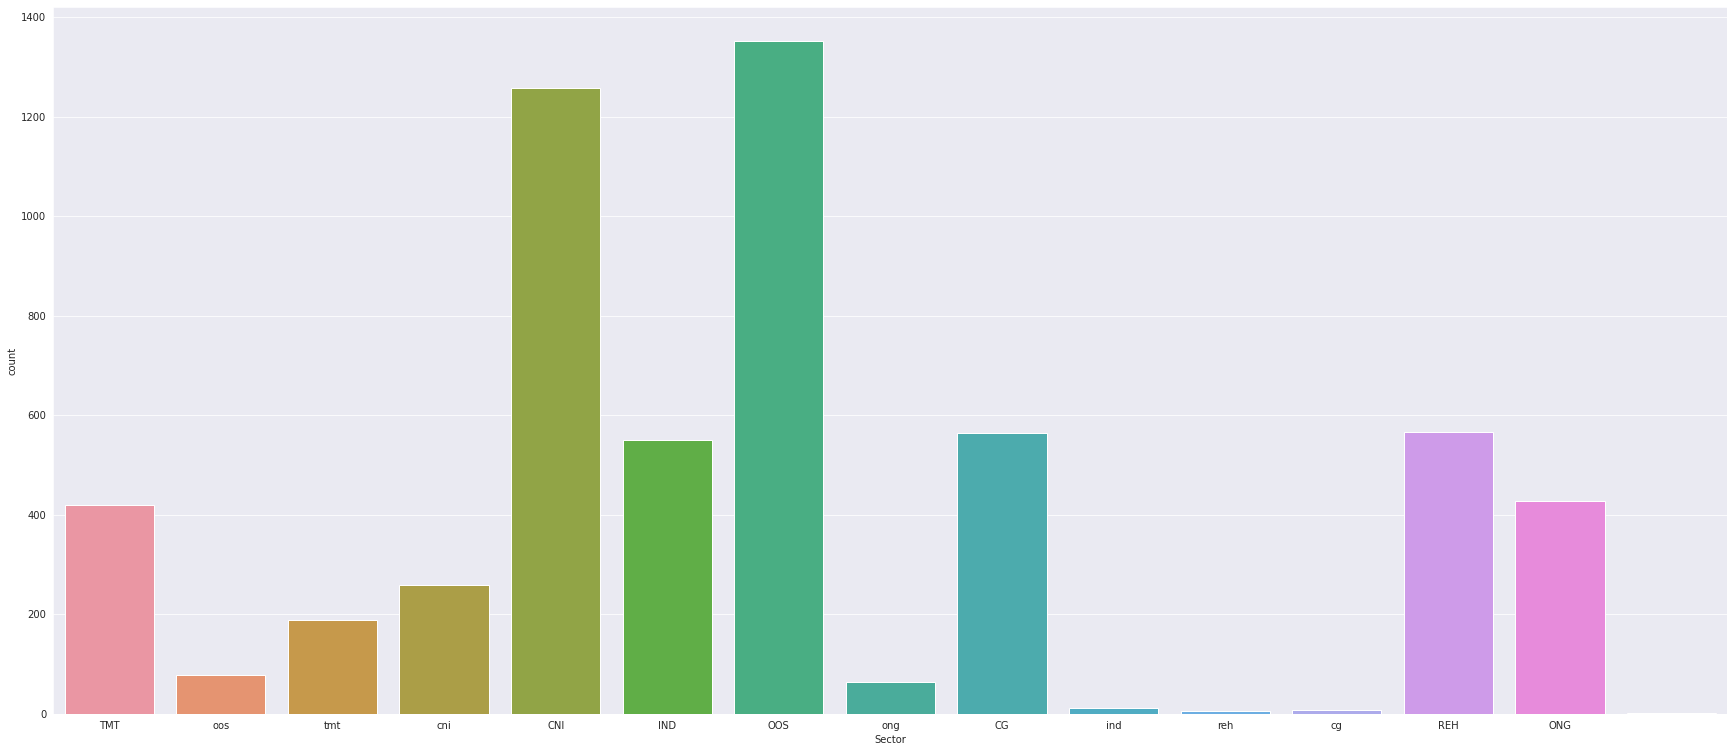

In [13]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

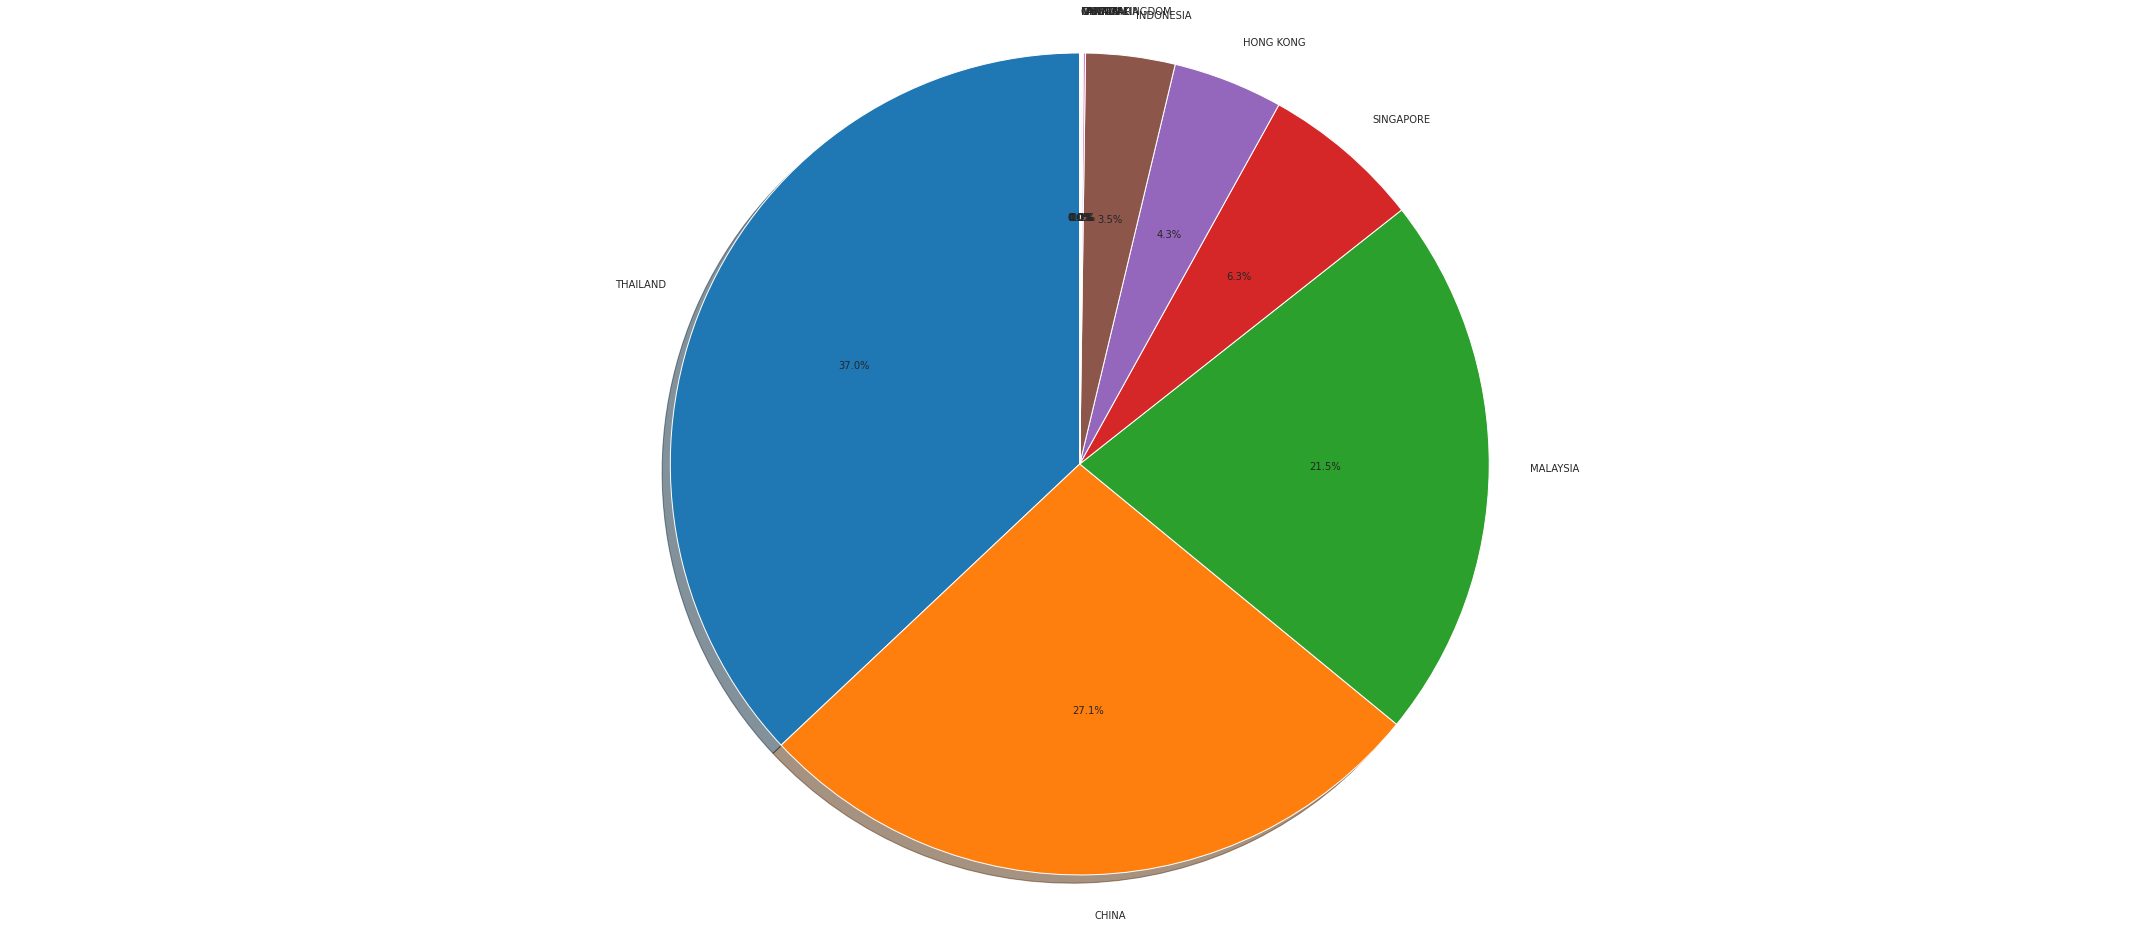

In [14]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [15]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 50 results and observe
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [16]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace('\n',' ', regex=True)

# now we validate to see if theye are really gone
df_valid.loc[0:49,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [17]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head()

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


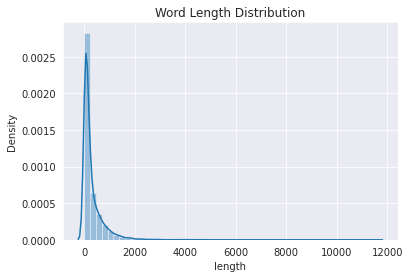

In [18]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Subsample from the entire dataset

---

We will now subsample a part of the dataset from the entire dataset. This is important as firstly, we need to ensure that our tokenization is working correctly in a smaller scale dataset, since using the entire dataset to do it will be very time consuming.

In [19]:
# declare sample size here first (CHANGE IT AS THE TRAINING DATA INCREASES)
sample_size = 350

# now we will get the data from the restricted range of sample size
subsample = df_valid[:sample_size]
subsample

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524.0
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593.0
...,...,...,...,...,...,...,...,...
369,KOIZUMI LIGHTING SINGAPORE PTE. LTD.,SINGAPORE,cni,building_material,building_material_manufacturer,midstream,"MANUFACTURE AND REPAIR OF ELECTRIC LAMPS AND LIGHTING EQUIPMENT (INCLUDING SILVER REFLECTORS, FITTINGS AND PARTS)",114.0
370,"LUMINTU INSAN MANDIRI,PT",INDONESIA,cni,buildings & industrial,buildings & industrial_contractor,midstream,"PT. Lumintu Insan Mandiri , is a company that runs a business within the scope of Engineering and Construction for Civil and Mechanical Electrical including Procurement Services.",179.0
372,"COETERNITY CO.,LTD.",THAILAND,oos,others,others,NaN,"Production and distribution of sandpaper, equipment used in industrial plants",77.0
373,"UFCT TECHNOLOGY CO., LIMITED",HONG KONG,tmt,consumer electronics,consumer electronics_distributor,downstream,"UFCT is an authorized distributor of an electronic component product. Since the beginning of 2014, it has entered a clear position in the electronics distributor business. The main agent line is located in the internationally known resource type product line. The qualification of the strong product line determines the company's industry status. The company has the world famous chip brand MTK and SK SKHynix, one of the three global industrial storage providers, as well as the Korean brand FCI agent qualification, Taiwan brand Lepower agent qualification. Both MTK and SK helix are the leading global IC ind

### 4.4. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [20]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593
...,...,...,...,...,...,...,...,...
6595,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,"PAN ENERGY is an ACRA-registered entity that has been operating for 5 years 7 months in Singapore since its incorporation y in 2015. Officially, PAN ENERGY PTE. LTD. is registered as Exempt Private Limited Company with its address in District 9 (Orchard, Cairnhill, River Valley), primarily operates in the sector of ""SHIPPING LINES (SCHEDULED SERVICES)"", SSIC code - 50021 SHIP BUNKERING",388
6596,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,,"Established in 2000, TI has grown to become one of Southeast Asia's leaders in leather cut and sewn furniture covers.",118
6597,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,"Siak Siong Group is an established group specialised in construction industry with diversity in engineering industry, real estate development, building materials industry, plantation and Real Estate Investment and Management industry.",234
6598,"KIJ THAWEE PATTANA CO.,LTD.",THAILAND,REH,commercial,commercial_operator,DOWNSTREAM,"Rental, purchase, sale and real estate operations",49


### 4.5. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [21]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [22]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

(5745, 9)

### 4.6. Text Tokenization, Removing Stop Words, punctuations, numbers, stop words and Lower Case

---

Now we will start to tokenize the word after we have ensure that the text description between the company descriptions are homogenous. In this process, we will also process with stop words, punctuations, numeric figures, lower cap words and lemmatize words all using the spaCy API.

In [23]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

Here we will do everything necessary to start up spacy for use in preprocessing the text.

In [24]:
# import required libraries 
from spacy.language import Language
from spacy.tokens import Doc
from spacy.lang.char_classes import ALPHA, ALPHA_LOWER, ALPHA_UPPER, CONCAT_QUOTES, LIST_ELLIPSES, LIST_ICONS
from spacy.util import compile_infix_regex

# initialise nlp engine
nlp = spacy.load("en_core_web_lg")

# declare custom properties
Doc.set_extension('processed', default=True, force=True)

# Modify tokenizer infix patterns
infixes = (
    LIST_ELLIPSES
    + LIST_ICONS
    + [
        r"(?<=[0-9])[+\-\*^](?=[0-9-])",
        r"(?<=[{al}{q}])\.(?=[{au}{q}])".format(
            al=ALPHA_LOWER, au=ALPHA_UPPER, q=CONCAT_QUOTES
        ),
        r"(?<=[{a}]),(?=[{a}])".format(a=ALPHA),
        r"(?<=[{a}0-9])[:<>=/](?=[{a}])".format(a=ALPHA),
    ]
)

infix_re = compile_infix_regex(infixes)
nlp.tokenizer.infix_finditer = infix_re.finditer

# custom lemmatizer
@Language.component("custom_preprocess")
def custom_preprocess(doc):
    temp = []

    # filter through each token and add to preprocessed text if requirements #
    # met.                                                                   #
    for t in doc:
        if (not t.is_punct and not t.like_num and not t.is_stop and not t.is_digit and not (t.ent_type == 396 or t.ent_type == 397)):
            temp.append(t.lemma_.upper())

    doc._.processed = temp

    return doc

# add custom pipeline components to default pipeline
nlp.add_pipe('custom_preprocess', last=True)

<function __main__.custom_preprocess>

In [25]:
# run the pipeline on data
processed_doc = list(nlp.pipe(df_valid['Company Profile Information']))

In [26]:
# add lemmatised words to dataframe
df_valid['processed'] = [doc._.processed for doc in processed_doc]

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEAN, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATE, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER, ELECTRONIC, TELECOMMUNICATION, HEALTHTECH, LEAD, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]"
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,TMT,it_services,it_services,MIDSTREAM,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593,"[6, 17, 46, 5]","[TONGDUN, TECHNOLOGY, PROFESSIONAL, THIRD-PARTY, INTELLIGENT, RISK, MANAGEMENT, DECISION-MAKING, SERVICE, PROVIDER, HEADQUARTER, HANGZHOU, ZHEJIANG, INTEGRATE, ARTIFICIAL, INTELLIGENCE, BUSINESS, SCENARIO, TONGDUN, TECHNOLOGY, OFFER, SOLUTION

### 4.7. Bag of Words

---

Here, we will perform the BoW sorting.

In [27]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1481


In [28]:
# do bag of words
bow_vectors = []
for index, row in df_valid.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1

    # append to dataframe
    bow_vectors.append(list(dictionary.values()))

    # print(f'{sum(dictionary.values()):>3}/{len(dictionary.values()):<3} |', dictionary.values())

df_valid['BoW_vectors'] = bow_vectors

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length,list_tag,processed,BoW_vectors
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,MIDSTREAM,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238,"[6, 18, 49, 5]","[YEAR, EXPERIENCE, CREATE, DEVELOP, HIGH-QUALITY, LEARNING, MATERIAL, ENABLE, PROVIDE, WORLD-CLASS, EDUCATIONAL, INNOVATION, MEET, NEED, TEACHER, STUDENT, INSTITUTION, EDUCATIONAL, AUTHORITY]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273,"[6, 8, 20, 3]","[YATAI, MAIN, PRODUCT, COVER, CLEANING, MACHINERY, CLEAN, AGENT, CLEAN, TOOL, STONE, MAINTENANCE, CLEANING, PRODUCT, CLEAN, SOLUTION, SERVICE, INCLUDE, PRODUCT, TECHNICAL, CONSULTATION, PRODUCT, CUSTOMIZATION, EMPLOYEE, TRAINING, MAINTENANCE]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,EXIS TECH SDN. BHD.,MALAYSIA,OOS,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344,"[4, 24, 64, 0]","[BEGINNING, START, PROVIDE, TECHNICAL, SUPPORT, TEST, HANDLER, MOVE, MODULE, DESIGN, PRODUCTION, IN-HOUSE, DESIGN, FULL-FLEDGED, HANDLER, INTRODUCE, COMPANY, DESIGN, PRODUCE, WIDE, RANGE, TURRET, PICK-AND-PLACE, SOLUTION, CUSTOMER, WORLD]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,DOWNSTREAM,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524,"[6, 8, 20, 3]","[TURNKEY, ONE-STOP, INTEGRATE, SOLUTION, PROVIDER, BASE, SINGAPORE, AZTECH, EQUIP, STATE-OF-THE-ART, EQUIPMENT, R&D, DESIGN, MANUFACTURING, PACKAGING, CAPABILITY, DELIVER, SEAMLESS, UNIFIED, EXPERIENCE, TIME, STRIVE, EDGE, TECHNOLOGY, YEAR, BUILD, CAPABILITY, SERVE, CLIENT, MANUFACTURING, NEED, INCLUDE, CONSUMER, ELECTRONIC, TELECOMMUNICATION, HEALTHTECH, LEAD, LIGHTING, AUTOMOTIVE, TECHNOLOGY, START-UP, MARKET, SEGMENT]","[0,

In [29]:
# clean up BoW data 
temp = 0
for index, row in df_valid.iterrows():
    if sum(row['BoW_vectors']) < 1:
        df_valid.drop(index, inplace=True)

df_valid.shape

(4476, 11)

In [30]:
# import validation dataset
df_test = pd.read_excel('./val_dataset.xlsx')
df_test.replace('NAN', np.NaN, inplace=True)

# drop unnecessary columns
df_test.drop(rows_to_drop, axis=1, inplace=True)

# replace newline characters in validation data
df_test = df_test = df_test.replace('\n', ' ', regex=True)

# fill in NAN values in validation data
df_test.fillna(' ', inplace=True)

# change dtype of validation data columns
for i in columns_to_convert:
    df_valid[i] = df_valid[i].astype(str)
    
# process validation dataset
df_test['Valuechain'] = df_test['Valuechain'].str.split().str.join(' ')
df_test['Valuechain'] = df_test['Valuechain'].str.upper()
df_test['Sector'] = df_test['Sector'].str.upper()
df_test['Valuechain'].replace('', ' ', inplace=True)

# add tags to validation data
taglist_df = []
# process tags for records
for index, row in df_test.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except Exception as e:
        # drop data if not valid
        print(row.name, e, '\n')
        df_test.drop(index, inplace=True)

df_test['list_tag'] = taglist_df

# run spacy on validation data
evaluate_doc = list(nlp.pipe(df_test['Company Profile Information']))

# add spacy processed words and vectors to validation dataframe
df_test['processed'] = [doc._.processed for doc in evaluate_doc]
df_test['tok2vec_vectors'] = [doc.vector for doc in evaluate_doc]

# do bow processing
bow_vectors = []
for index, row in df_test.iterrows():
    company = row['processed']

    dictionary = dict.fromkeys(keywords_masterlist, 0)
    for word in company:
        if word in keywords_masterlist:
            dictionary[word] += 1

    # append to dataframe
    bow_vectors.append(list(dictionary.values()))

df_test['BoW_vectors'] = bow_vectors

# clean up BoW data 
temp = 0
for index, row in df_test.iterrows():
    if sum(row['BoW_vectors']) < 1:
        df_test.drop(index, inplace=True)

df_test.head(3)

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,list_tag,processed,tok2vec_vectors,BoW_vectors
0,"BANGKOK ROLLER CO., LTD.",THAILAND,OOS,others,others,,"Bangkok Roller Co., Ltd. is the leading manufacturer and supplier of supplier rolls in Thailand. For over 20 years, we have been trusted by local and overseas customer. Our Rubber roll products have been major role in many manufacturing industries such as paper, steel sheets, textiles, plastic, films, printing, packaging product, and many more. Furthermore, our reputable rubber roll products have been parted in reducing the import of high priced rubber rolls from overseas.","[4, 24, 64, 0]","[BANGKOK, ROLLER, CO., LTD., LEAD, MANUFACTURER, SUPPLIER, SUPPLIER, ROLL, THAILAND, YEAR, TRUST, LOCAL, OVERSEAS, CUSTOMER, RUBBER, ROLL, PRODUCT, MAJOR, ROLE, MANUFACTURING, INDUSTRY, PAPER, STEEL, SHEET, TEXTILE, PLASTIC, FILM, PRINTING, PACKAGING, PRODUCT, FURTHERMORE, REPUTABLE, RUBBER, ROLL, PRODUCT, PART, REDUCE, IMPORT, HIGH, PRICE, RUBBER, ROLL, OVERSEAS]","[-0.056447383, 0.21101695, -0.031103438, -0.17660287, 0.16936646, 0.029999636, -0.02729656, -0.11956256, -0.13651244, 1.8386289, -0.15647945, 0.029125435, 0.11581242, -0.1224828, -0.075444, -0.093223214, 0.06679476, 1.3783227, -0.15340182, 0.13426617, -0.05553677, 0.0733473, -0.05833775, 0.046665534, -0.011252216, 0.015606452, -0.10524113, -0.03883239, 0.012557545, -0.07256938, 0.104613096, 0.06876958, -0.11247012, 0.08075604, 0.10944588, -0.05372884, 0.014704669, -0.009136189, 0.08763046, -0.036022905, 0.03523675, 0.07158786, 0.049226988, -0.13759813, -0.08809008, 0.019306742, -0.09959378, -0.0792771, 0.12232084, -0.004915998, 0.07396954, -0.029459797, -0.03244562, -0.025194354, -0.022714354, -0.052229084, 0.035303228, -0.118275955, 0.015565012, -0.10310424, 0.008569539, -0.14869425, -0.024494044, 0.18901749, 0.079915404, -0.035579078, 0.06129637, 0.14250755, -0.016735168, 0.077657625, -0.02607618, 0.06608145, 0.077682376, 0.039997973, 0.091477185, 0.07980899, 0.0704945, 0.020879705, 0.081921235, 0.10234961, 0.039634015, 0.1061775, -0.11746443, -0.089563645, -0.027652077, -0.30871576, -0.046182428, 0.40071592, 0.19297376, 0.11824047, 0.010926973, -0.054769695, -0.017911289, 0.04894328, 0.12306946, -0.0728587, 0.07885992, -0.069001995, -0.11834788, -0.042323086, ...]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,MJETS LIMITED,THAILAND,OOS,others,others,,"MJets currently operates the first and only FBO & Private Jet Terminal in Thailand offering 7 distinct business lines. These include: aircraft charter, aircraft management, consultancy, maintenance & AOG services, air ambulance, ground handling services and FBO facilities with VIP lounge. The highest of safety standards, world-class service and a personal touch are the things about us that have allowed MJets to continue to lead private aviation in Thailand and South-East Asia.","[4, 24, 64, 0]","[MJETS, CURRENTLY, OPERATE, FBO, PRIVATE, JET, TERMINAL, THAILAND, OFFER, DISTINCT, BUSINESS, LINE, INCLUDE, AIRCRAFT, CHARTER, AIRCRAFT, MANAGEMENT, CONSULTANCY, MAINTENANCE, AOG, SERVICE, AIR, AMBULANCE, GROUND, HANDLING, SERVICE, FBO, FACILITY, VIP, LOUNGE, HIGH, SAFETY, STANDARD, WORLD-CLASS, SERVICE, PERSONAL, TOUCH, THING, ALLOW, MJETS, CONTINUE, LEAD, PRIVATE, AVIATION, THAILAND, SOUTH-EAST, ASIA]","[0.0809934, 0.14199032, 0.028656067, -0.08420108, 0.20223913, -0.027773317, 0.032055527, -0.07215808, -0.0042647133, 1.8860918, -0.19495092, -0.075085916, 0.06470871, 0.018912286, -0.11437266, -0.08431523, -0.09094049, 1.2504501, -0.16896108, -0.012921025, -0.027268585, 0.087456286, -0.102900065, -0.116656445, 0.09514114, 0.023276709, -0.06993913, -0.015264425, 0.09763413, 0.014724674, 0.05

---
---

# 5.Models
---
Here we will train the model that will help categorize each company.

### 5.1. Training Models

---

We shall commence training.

In [31]:
import keras

print('--- Version Checking ---')
print("Keras:", keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [32]:
from keras.preprocessing import sequence
# distribution = int(df_valid.shape[0] * 0.8)

# # split datasets to train and test and do a 80%, 20% split
# df_train = df_valid.iloc[:distribution]
# df_test = df_valid.iloc[distribution:]

# df_train.fillna(0, inplace=True)
# df_test.fillna(0, inplace=True)

X_train = sequence.pad_sequences(np.array(list(df_valid['BoW_vectors'])))
y_train = np.array(list(df_valid['list_tag']))

X_test = sequence.pad_sequences(np.array(list(df_test['BoW_vectors'])))
y_test = np.array(list(df_test['list_tag']))

print(f'Train data shape: {X_train.shape}\nTest data shape: {X_test.shape}')

Train data shape: (4476, 1481)
Test data shape: (1071, 1481)


In [33]:
print(f'Train data labels: {y_train.__len__()}\nTest data labels: {y_test.__len__()}')

Train data labels: 4476
Test data labels: 1071


In [34]:
# define one hot encode function
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

In [35]:
# self-defined k max pooling layer (since keras does not offer)
from tensorflow.keras.layers import Flatten, Layer, InputSpec

class KMaxPooling(Layer):
    """
    K-max pooling layer that extracts the k-highest activations from a sequence (2nd dimension).
    TensorFlow backend.
    """
    def __init__(self, k=8, **kwargs):
        super().__init__(**kwargs)
        self.input_spec = InputSpec(ndim=3)
        self.k = k

    def compute_output_shape(self, input_shape):
        return (input_shape[0], (input_shape[2] * self.k))

    def call(self, inputs):

        # swap last two dimensions since top_k will be applied along the last dimension
        shifted_input = tf.transpose(inputs, [0, 2, 1])

        # extract top_k, returns two tensors [values, indices]
        top_k = tf.nn.top_k(shifted_input, k=self.k, sorted=True, name=None)[0]

        # return flattened output
        return Flatten()(top_k)

In [36]:
# convolutional block layer for 64 and 128 neurons
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv1D, Dense, Dropout, MaxPooling1D, GlobalAveragePooling1D, Input, Lambda, Embedding
from tensorflow.keras.layers import ReLU, BatchNormalization, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model

def convolutional_block_64_128(input_shape, num_filters):
  model = Sequential()

  # 1st conv layer
  model.add(Conv1D(filters=num_filters, kernel_size=3, strides=1, padding='same', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  
  # 2nd conv layer - 10th conv layer
  for i in range(9):
    model.add(Conv1D(filters=num_filters, kernel_size=3, strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

  return model

In [37]:
# convolutional block layer for 256 and 512 neurons
def convolutional_block_256_512(input_shape, num_filters):
  model = Sequential()

  # 1st conv layer
  model.add(Conv1D(filters=num_filters, kernel_size=3, strides=1, padding='same', input_shape=input_shape))
  model.add(BatchNormalization())
  model.add(Activation("relu"))
  
  # 2nd conv layer - 4th conv layer
  for i in range(3):
    model.add(Conv1D(filters=num_filters, kernel_size=3, strides=1, padding='same'))
    model.add(BatchNormalization())
    model.add(Activation("relu"))

  return model

In [38]:
# we need to define this function so that we can get the input shape to be fed to the conv blocks
def conv_shape(conv):
  return conv.get_shape().as_list()[1:]

In [39]:
# get the largest encoded value to put in Encoding Layer
# in this case, the encoding layer input_dim=> 14+1=15
np.max(X_train)

32

In [40]:
# we need to get the length of the keywords for a individual list
len(keywords_masterlist)

1481

In [41]:
def create_model(name, dist_words, input_dim, output_dim, num_filters):

  # 0th layer lookup table
  inputs = Input(shape=(input_dim, ))
  embedded_seq = Embedding(dist_words, 16, input_length=input_dim)(inputs)

  # 1st layer tem conv(64)
  conv = Conv1D(filters=64, kernel_size=3, strides=2, padding='same', name='temp_conv')(embedded_seq)

  # 2nd + 3rd layer convblock(64) * 2
  conv = convolutional_block_64_128(conv_shape(conv), num_filters[0])(conv)
  conv = convolutional_block_64_128(conv_shape(conv), num_filters[0])(conv)

  # 4th layer pool/2
  conv = MaxPooling1D(pool_size=3, strides=2, padding='same')(conv)

  # 5th + 6th layer convblock(128) * 2
  conv = convolutional_block_64_128(conv_shape(conv), num_filters[1])(conv)
  conv = convolutional_block_64_128(conv_shape(conv), num_filters[1])(conv)

  # 7th layer pool/21
  conv = MaxPooling1D(pool_size=3, strides=2, padding='same')(conv)

  # 8th + 9th layer convblock(256) * 2
  conv = convolutional_block_256_512(conv_shape(conv), num_filters[2])(conv)
  conv = convolutional_block_256_512(conv_shape(conv), num_filters[2])(conv)

  # 10th layer pool/2
  conv = MaxPooling1D(pool_size=3, strides=2, padding='same')(conv)

  # 11th + 12th layer convblock(512) * 2
  conv = convolutional_block_256_512(conv_shape(conv), num_filters[3])(conv)
  conv = convolutional_block_256_512(conv_shape(conv), num_filters[3])(conv)

  # # k max pooling (k=8)
  # k_max = KMaxPooling(k=8)(conv)
  
  # using Global Average Pooling instead of k max pooling, which will reduce overfitting. dense layer to shrink to 2D from 3D
  gap = GlobalAveragePooling1D()(conv)
  gap = Dense(8*512, activation=None)(gap)

  # # fully connected layers * 2
  # fc1 = Dense(2048, kernel_initializer='he_normal', activation='relu')(k_max)
  # fc2 = Dense(2048, kernel_initializer='he_normal', activation='relu')(fc1)

  # output layer
  out = Dense(output_dim, activation='sigmoid')(gap)

  # fit the entire nn using Keras Model class so that we can print out the model summary
  model = Model(inputs=inputs, outputs=out, name=name)

  return model

In [42]:
num_filters = [64, 128, 256, 512]

sector_model = create_model(name='sector_model', dist_words=(np.max(X_train)+1), input_dim=len(keywords_masterlist), output_dim=len(sector), num_filters=num_filters)
subsector_model = create_model(name='subsector_model', dist_words=(np.max(X_train)+1), input_dim=len(keywords_masterlist), output_dim=len(subsector), num_filters=num_filters)
archetype_model = create_model(name='archetype_model', dist_words=(np.max(X_train)+1), input_dim=len(keywords_masterlist), output_dim=len(archetype), num_filters=num_filters)
valuechain_model = create_model(name='valuechain_model', dist_words=(np.max(X_train)+1), input_dim=len(keywords_masterlist), output_dim=len(valuechain), num_filters=num_filters)

models = [sector_model, subsector_model, archetype_model, valuechain_model]

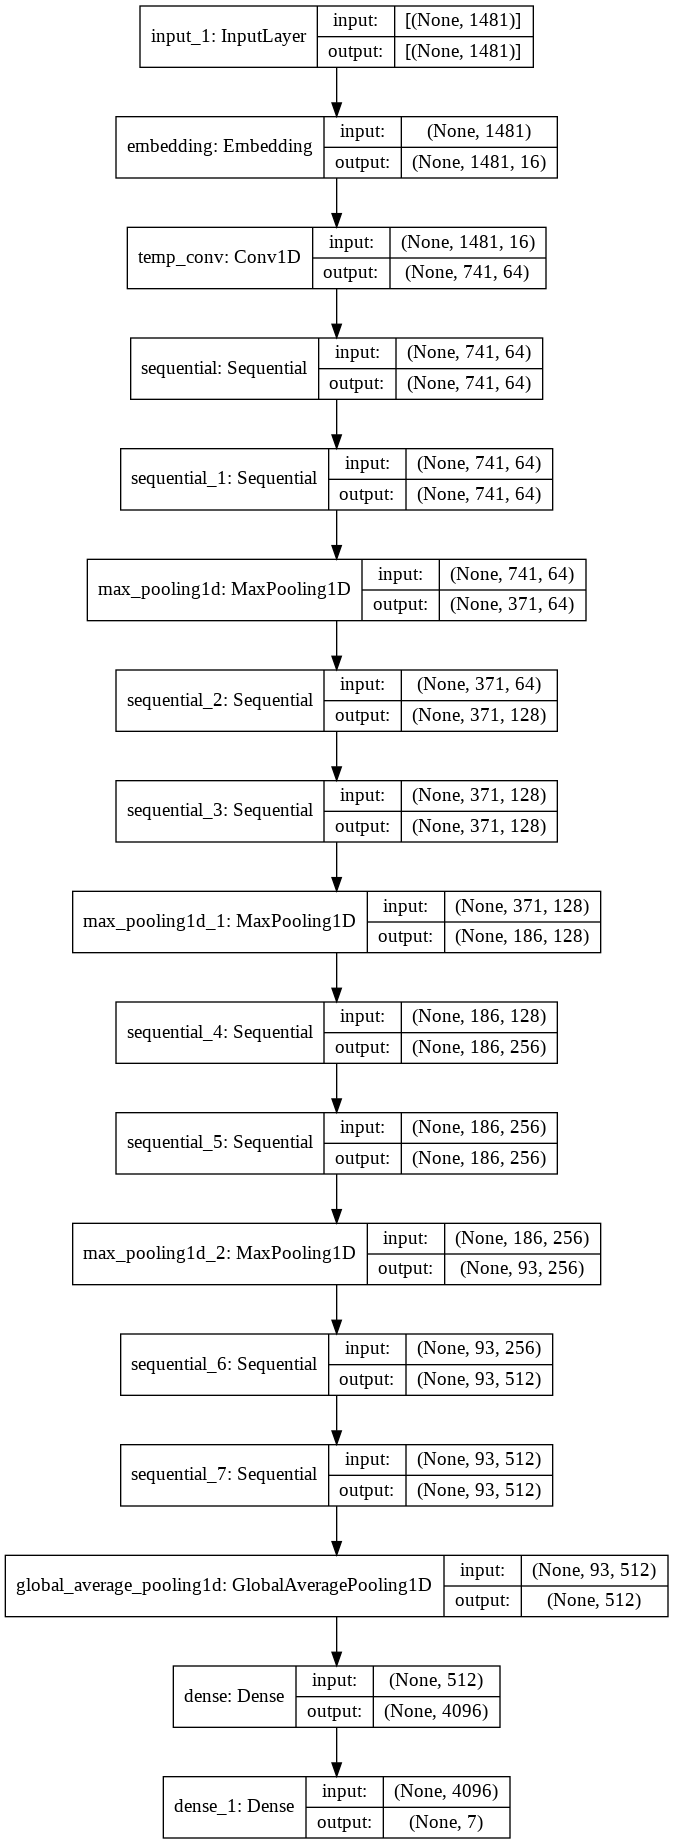

In [43]:
tf.keras.utils.plot_model(sector_model, "sector_model.png", show_shapes=True)

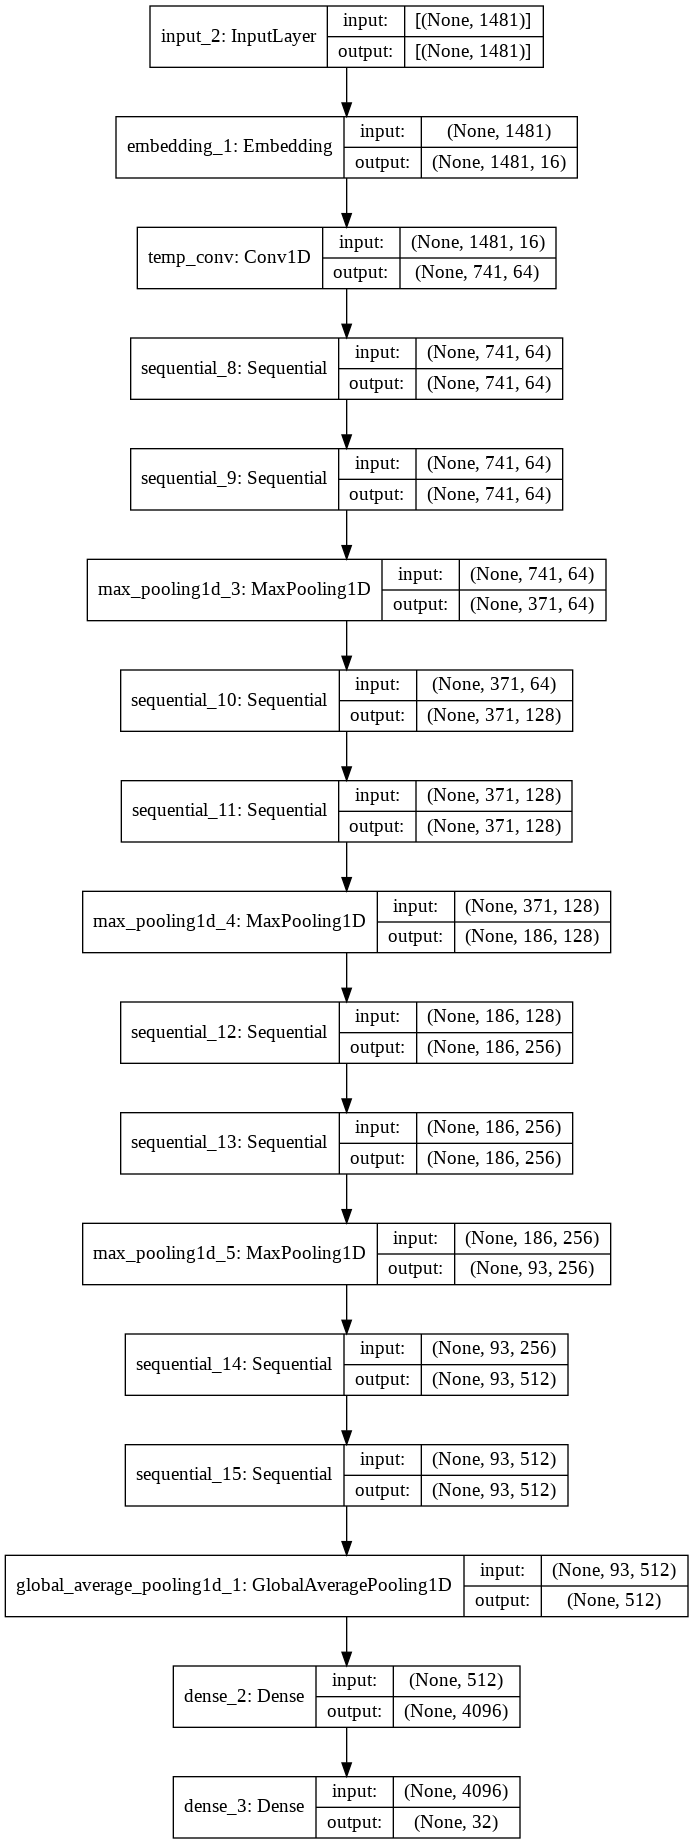

In [44]:
tf.keras.utils.plot_model(subsector_model, "subsector_model.png", show_shapes=True)

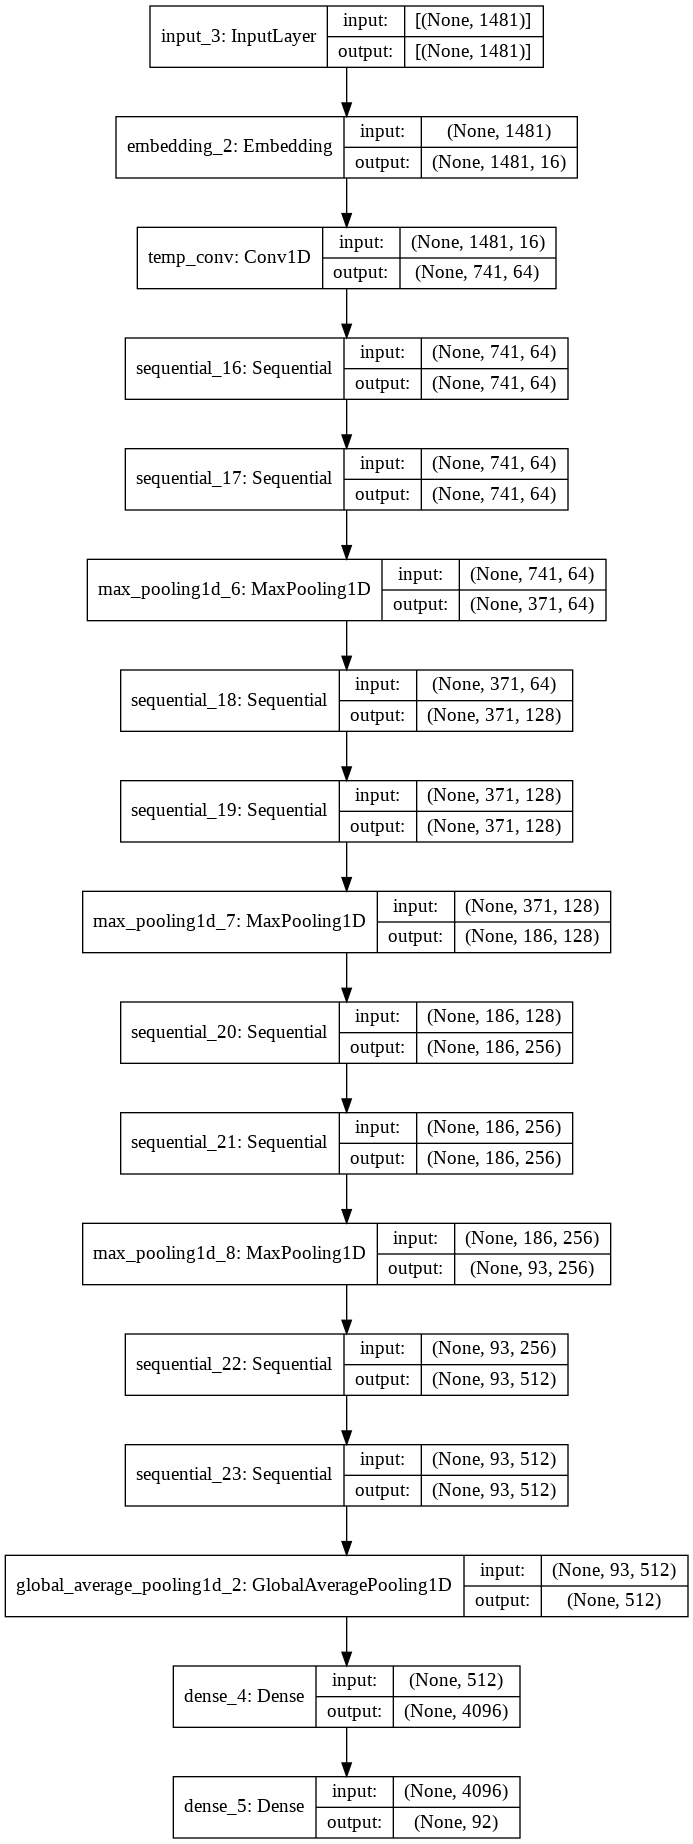

In [45]:
tf.keras.utils.plot_model(archetype_model, "archetype_model.png", show_shapes=True)

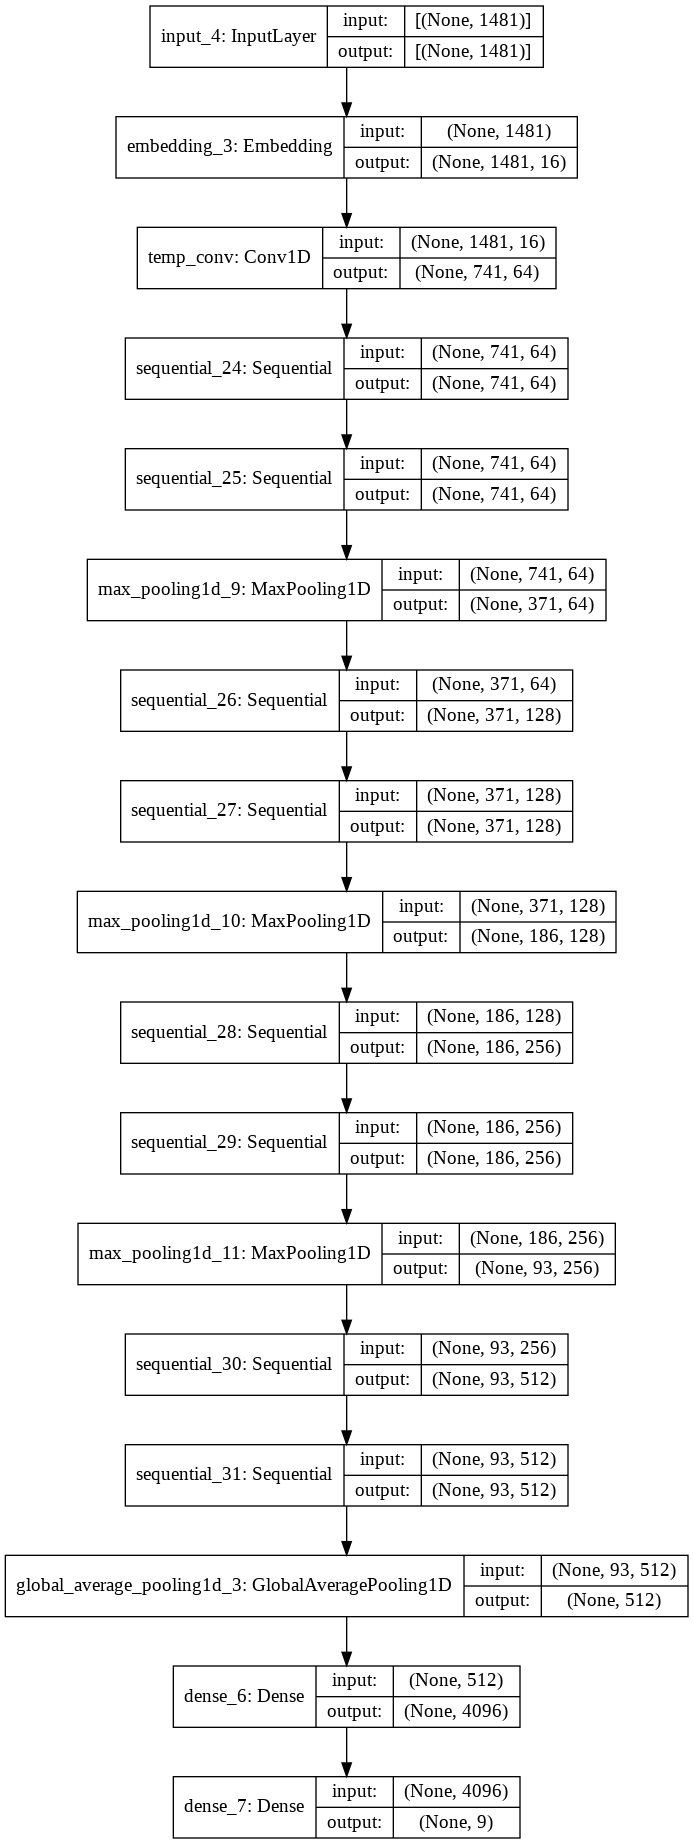

In [46]:
tf.keras.utils.plot_model(valuechain_model, "valuechain_model.png", show_shapes=True)

In [47]:
X_train.shape

(4476, 1481)

In [48]:
# now print the summary of the respective models
for model in models:
  model.summary()

Model: "sector_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1481)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 1481, 16)          528       
_________________________________________________________________
temp_conv (Conv1D)           (None, 741, 64)           3136      
_________________________________________________________________
sequential (Sequential)      (None, 741, 64)           126080    
_________________________________________________________________
sequential_1 (Sequential)    (None, 741, 64)           126080    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 371, 64)           0         
_________________________________________________________________
sequential_2 (Sequential)    (None, 371, 128)         

In [49]:
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD
from timeit import default_timer as timer

# as stated in the paper, they use SGD with lr=0.01, momentum=0.9, weight decay=0.001
opt = SGD(lr=0.01, momentum=0.9, decay=0.001)

# model training
start = timer() 
for i in range(4):
      models[i].compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', Precision(), Recall()])
      models[i].fit(X_train, one_hot(y_train[:,i], tag_counts[i]), validation_split=0.2, epochs=100, batch_size=20) # batch size changed from 64
end = timer() 
print("Total time taken for execution: ", end-start, "s")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
179/179 [==============================] - 73s 190ms/step - loss: 1.8474 - accuracy: 0.3067 - precision: 0.2119 - recall: 0.6288 - val_loss: 413.7261 - val_accuracy: 0.0982 - val_precision: 0.1758 - val_recall: 0.3516
Epoch 2/100
179/179 [==============================] - 33s 182ms/step - loss: 1.7875 - accuracy: 0.3240 - precision: 0.2200 - recall: 0.6288 - val_loss: 3.9156 - val_accuracy: 0.3058 - val_precision: 0.2616 - val_recall: 0.4286
Epoch 3/100
179/179 [==============================] - 32s 181ms/step - loss: 1.7661 - accuracy: 0.3313 - precision: 0.2296 - recall: 0.6316 - val_loss: 1.7756 - val_accuracy: 0.3359 - val_precision: 0.2261 - val_recall: 0.6384
Epoch 4/100
179/179 [==============================] - 33s 182ms/step - loss: 1.7493 - accuracy: 0.3377 - precision: 0.2313 - recall: 0.6461 - val_loss: 1.8503 - val_accuracy: 0.3103 - val_precision: 0.2469 - val_recall: 0.5647
Epoch 5/100
179/179 [==============================] - 32s 181ms/step - loss: 1.7591 -

KeyboardInterrupt: ignored

### 5.2 Testing Models

---

After we train finish, we shall now see the accuracy and loss graph to determine model overfitting and how the model turns out to be like.

In [ ]:
# subplots for model accuracies
fig = plt.figure(figsize=(23,9))

plt.subplot(2,2,1)
plt.plot(models[0].history.history['accuracy'])
plt.title('Model 1 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy'], loc='best')

plt.subplot(2,2,2)
plt.plot(models[1].history.history['accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy'], loc='best')

plt.subplot(2,2,3)
plt.plot(models[2].history.history['accuracy'])
plt.title('Model 3 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy'], loc='best')

plt.subplot(2,2,4)
plt.plot(models[3].history.history['accuracy'])
plt.title('Model 4 Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy'], loc='best')

plt.tight_layout()

In [ ]:
# subplot for model loss
fig = plt.figure(figsize=(23,9))

plt.subplot(2,2,1)
plt.plot(models[0].history.history['loss'])
plt.title('Model 1 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='best')

plt.subplot(2,2,2)
plt.plot(models[1].history.history['loss'])
plt.title('Model 2 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='best')

plt.subplot(2,2,3)
plt.plot(models[2].history.history['loss'])
plt.title('Model 3 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='best')

plt.subplot(2,2,4)
plt.plot(models[3].history.history['loss'])
plt.title('Model 4 loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss'], loc='best')

plt.tight_layout()

In [ ]:
# print the results
print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall')
for i in range(4):
  loss, accuracy, precision, recall = models[i].evaluate(X_test, one_hot(y_test[:,i], tag_counts[i]), verbose=0)
  print(f'Model {i+1:<10}{loss:<8.3f}{accuracy:<8.3%}\t{precision:<9.3f}\t{recall:<6.3f}')

In [ ]:
results = sector_model.predict(X_test)
results = np.argmax(results, axis=1)

for i in range(len(results)):
    print(f'Expected: {y_test[i,0]} Got: {results[i]}')

In [ ]:
results

### 5.3. Saving Models

In [ ]:
# save models to file
for i in range(4):
    models[i].save(f'./model_{i+1}')

INFO:tensorflow:Assets written to: ./model_1/assets
INFO:tensorflow:Assets written to: ./model_2/assets
INFO:tensorflow:Assets written to: ./model_3/assets
INFO:tensorflow:Assets written to: ./model_4/assets


In [ ]:
!zip -r model_4.zip ./model_4

  adding: model_4/ (stored 0%)
  adding: model_4/saved_model.pb (deflated 89%)
  adding: model_4/variables/ (stored 0%)
  adding: model_4/variables/variables.index (deflated 66%)
  adding: model_4/variables/variables.data-00000-of-00001 (deflated 43%)
  adding: model_4/assets/ (stored 0%)


---
---

# 10.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

